In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pysankey import sankey

In [2]:
sankey_data = pd.read_csv('./sankey_test.txt',index_col=0)
sankey_data.head()

,customer,good,revenue
0,John,fruit,5.5
1,Mike,meat,11.0
2,Betty,drinks,7.0
3,Ben,fruit,4.0
4,Betty,bread,2.0


In [3]:
color_dict = {
    'Ben': 'red',
    'Betty': 'blue',
    'Mike':'yellow',
    'John':'green',
    'fruit':'#f71b1b',
    'meat':'#1b7ef7',
    'drinks':'#f3f71b',
    'bread':'#12e23f',
}

In [4]:
sankey_df = sankey_data.value_counts(['customer','good']).reset_index()
sankey_df.columns = ['customer','good','weight']
sankey_df.head()

,customer,good,weight
0,Ben,bread,1
1,Ben,fruit,1
2,Betty,bread,1
3,Betty,drinks,1
4,John,bread,1


In [5]:
order = sankey_df.customer.value_counts().index.tolist()
order

['John', 'Ben', 'Betty', 'Mike']

In [6]:
sankey_data['customer'] = pd.Categorical(sankey_data.customer,order)

In [7]:
sankey_data = sankey_data.sort_values(by=['customer'],ascending=False)
sankey_data

,customer,good,revenue
1,Mike,meat,11.0
8,Mike,bread,3.5
2,Betty,drinks,7.0
4,Betty,bread,2.0
3,Ben,fruit,4.0
7,Ben,bread,2.0
0,John,fruit,5.5
5,John,bread,2.5
6,John,drinks,8.0
9,John,meat,13.0


In [8]:
sankey_data['good'] = pd.Categorical(sankey_data['good'],['drinks','fruit','meat','bread'])

In [9]:
sankey_data = sankey_data.sort_values(by=['customer','good'],ascending=False)

In [12]:
sankey_data.head()

,customer,good,revenue
1,Mike,meat,11.0
8,Mike,bread,3.5
2,Betty,drinks,7.0
4,Betty,bread,2.0
3,Ben,fruit,4.0


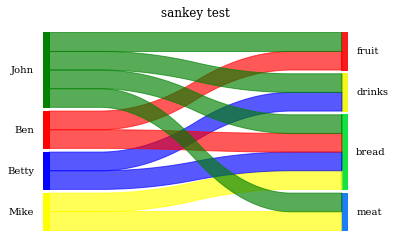

In [33]:

plt.rcParams["font.sans-serif"]=["SimHei",'KaiTi','FangSong'] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

ax = sankey(
    left=sankey_data['customer'],
    right=sankey_data['good'],
    colorDict=color_dict,
    fontsize=10
    )
ax.set(title='sankey test')
plt.savefig('sankey_test.png',bbox_inches="tight", dpi=150)

In [13]:
import floweaver as fl

In [14]:
test_df = pd.read_csv("WorldCruiseData.csv")
test_df.head()

,ROUTE,EMBARK_PORT,DISEMBARK_PORT,CABIN_TYPE,DURATION,CRUISE_REGION,BOOKING_WEEK_PRIOR,CANCEL_WEEK_PRIOR,EMBARK_REGION,DEBARK_REGION,PRICE_PAID,NO_OF_PEOPLE_ON_BOOKING
0,SOU-AKL,SOU,AKL,O,40,West Bound,33,33.0,UK,New Zealand,2811.127882,2
1,SOU-AKL,SOU,AKL,O,40,West Bound,45,NaN,UK,New Zealand,5171.396346,2
2,SOU-AKL,SOU,AKL,B,40,West Bound,42,NaN,UK,New Zealand,6343.673826,2
3,SOU-BNE,SOU,BNE,B,47,West Bound,36,35.0,UK,Australia - Queensland,9784.513217,2
4,SOU-SFO,SOU,SFO,B,24,Panama Canal,57,NaN,UK,USA - West Coast,4182.892388,2


In [17]:
flows = (
    test_df.groupby(["EMBARK_PORT", "DISEMBARK_PORT", "CRUISE_REGION"])
    .agg({"PRICE_PAID": "mean"})
    .dropna()
    .reset_index()
)
flows.head()

,EMBARK_PORT,DISEMBARK_PORT,CRUISE_REGION,PRICE_PAID
0,AKL,DXB,Southeast Asia,6316.442287
1,AKL,HKG,GB Reef/Queensland,3876.470003
2,AKL,SIN,Southeast Asia,4695.273808
3,AKL,SOU,Southeast Asia,19594.879464
4,AKL,SYD,New Zealand,493.353681


In [18]:
flows = (
    flows.rename(
        columns={
            "EMBARK_PORT": "source",
            "DISEMBARK_PORT": "target",
            "CRUISE_REGION": "type",
            "PRICE_PAID": "value",
        }
    )
)

In [20]:
nodes = {
    "embark_port": fl.ProcessGroup(flows["source"].unique().tolist()),
    "disembark_port": fl.ProcessGroup(flows["target"].unique().tolist()),
}

ordering = [["embark_port"], ["disembark_port"]]
bundles = [fl.Bundle("embark_port", "disembark_port")]
sdd = fl.SankeyDefinition(nodes, bundles, ordering)
fl.weave(sdd, flows).to_widget()

SankeyWidget(layout=Layout(height='500', width='700'), links=[{'source': 'embark_port^*', 'target': 'disembark…

In [21]:
embark_port = fl.Partition.Simple("process", flows["source"].unique().tolist())
disembark_port = fl.Partition.Simple("process", flows["target"].unique().tolist())

nodes["embark_port"].partition = embark_port
nodes["disembark_port"].partition = disembark_port

# Create Sankey diagram
fl.weave(sdd, flows).to_widget()

SankeyWidget(groups=[{'id': 'embark_port', 'type': 'process', 'title': '', 'nodes': ['embark_port^AKL', 'embar…

In [27]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()